In [3]:
import networkx as nx
from numpy.random import choice
import random
import numpy as np

def initialize_network() -> nx.digraph: # initializes a directed network with two nodes
    G = nx.DiGraph()
    G.add_node(0)
    G.add_node(1)
    G.add_edge(0,1)
    return G

def generate_network(N: int, C: int, m: int, alpha: float) -> nx.digraph:
    G = initialize_network()
    for step in range(2, N): ## one step for each node to add, we already have 2 nodes (id 0 and 1)
        for _ in range(m): ## one step for each edge to add
            rand = random.random() 
            if rand < alpha: ## do we add an edge from new to old?
                eligble_nodes = [node for node in G.nodes if G.has_edge(step, node) == False and step != node] ## only choose from nodes that aren't already connected in this direction
                in_degrees = [G.in_degree(node) + C for node in eligble_nodes]
                if len(eligble_nodes) > 0:
                    node_choose = choice(eligble_nodes, 1, p=np.array(in_degrees)/sum(in_degrees))[0]
                    G.add_edge(step, node_choose)
            else:
                eligble_nodes = [node for node in G.nodes if G.has_edge(node, step) == False and step != node] ## only choose from nodes that aren't already connected in this direction
                out_degrees = [G.out_degree(node) + C for node in eligble_nodes]
                if len(eligble_nodes) > 0:
                    node_choose = choice(eligble_nodes, 1, p=np.array(out_degrees)/sum(out_degrees))[0]
                    G.add_edge(node_choose, step)
    return G

In [22]:
test_output = generate_network(849, 1, 5, .70)

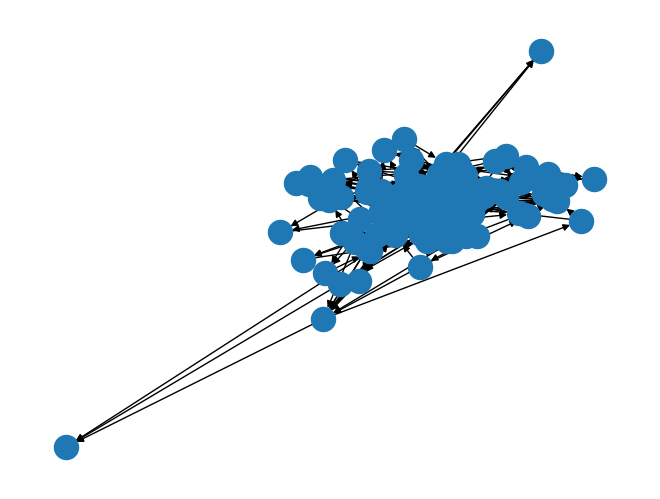

In [6]:
nx.draw(test_output)

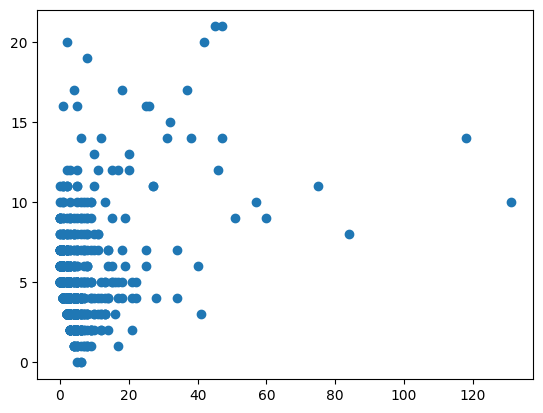

In [23]:
import matplotlib.pyplot as plt

plt.scatter(list(dict(test_output.in_degree()).values()), list(dict(test_output.out_degree()).values()))

<AxesSubplot: xlabel='arrival', ylabel='in_degree'>

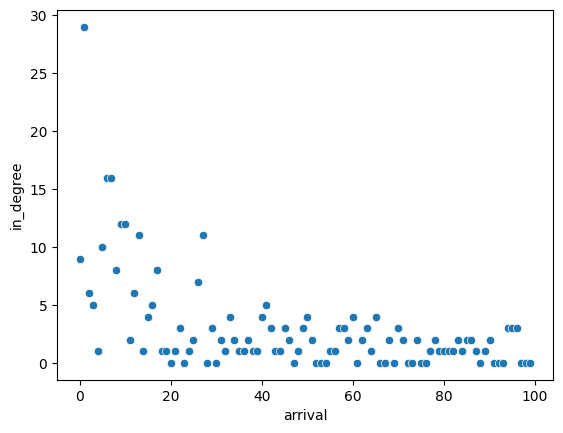

In [19]:
import pandas as pd
import seaborn as sns

in_degree_distr = pd.DataFrame(list(test_output.in_degree()), columns=["arrival", "in_degree"])

sns.scatterplot(x = "arrival", y = "in_degree", data = in_degree_distr)



<AxesSubplot: xlabel='arrival', ylabel='out_degree'>

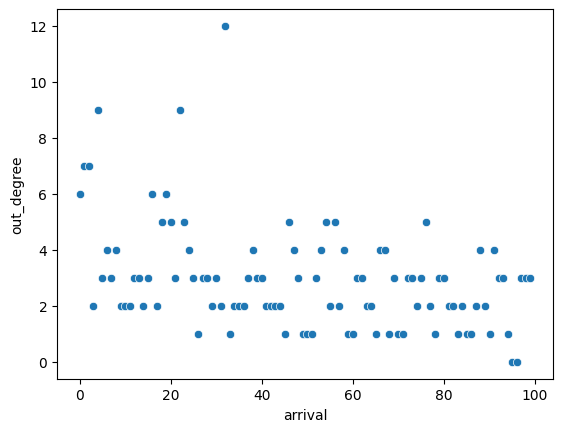

In [20]:
out_degree_distr = pd.DataFrame(list(test_output.out_degree()), columns=["arrival", "out_degree"])

sns.scatterplot(x = "arrival", y = "out_degree", data = out_degree_distr)



(array([80., 10.,  4.,  0.,  3.,  1.,  0.,  1.,  0.,  1.]),
 array([ 0. ,  3.4,  6.8, 10.2, 13.6, 17. , 20.4, 23.8, 27.2, 30.6, 34. ]),
 <BarContainer object of 10 artists>)

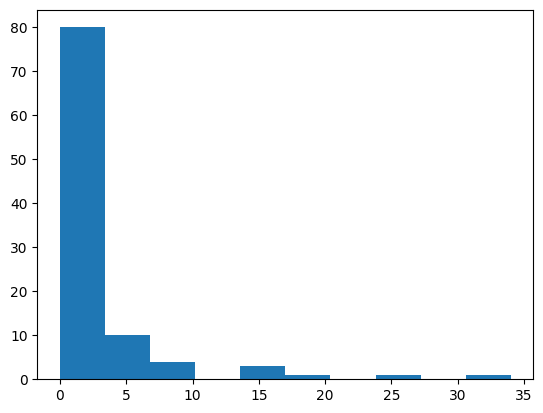

In [111]:



plt.hist(list(dict(test_output.in_degree()).values()))

(array([ 3., 11., 22.,  0., 38., 14.,  0.,  5.,  5.,  2.]),
 array([0. , 0.7, 1.4, 2.1, 2.8, 3.5, 4.2, 4.9, 5.6, 6.3, 7. ]),
 <BarContainer object of 10 artists>)

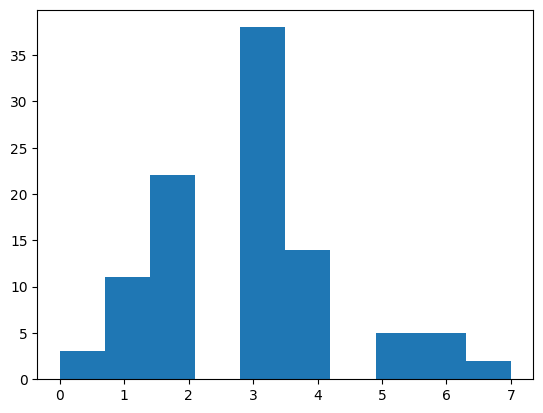

In [112]:
plt.hist(list(dict(test_output.out_degree()).values()))